In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [146]:
from sklearn.metrics import accuracy_score

In [147]:
df = pd.read_csv('heart.csv')

In [148]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [149]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [150]:
df.describe( ).transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [151]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: xlabel='target', ylabel='count'>

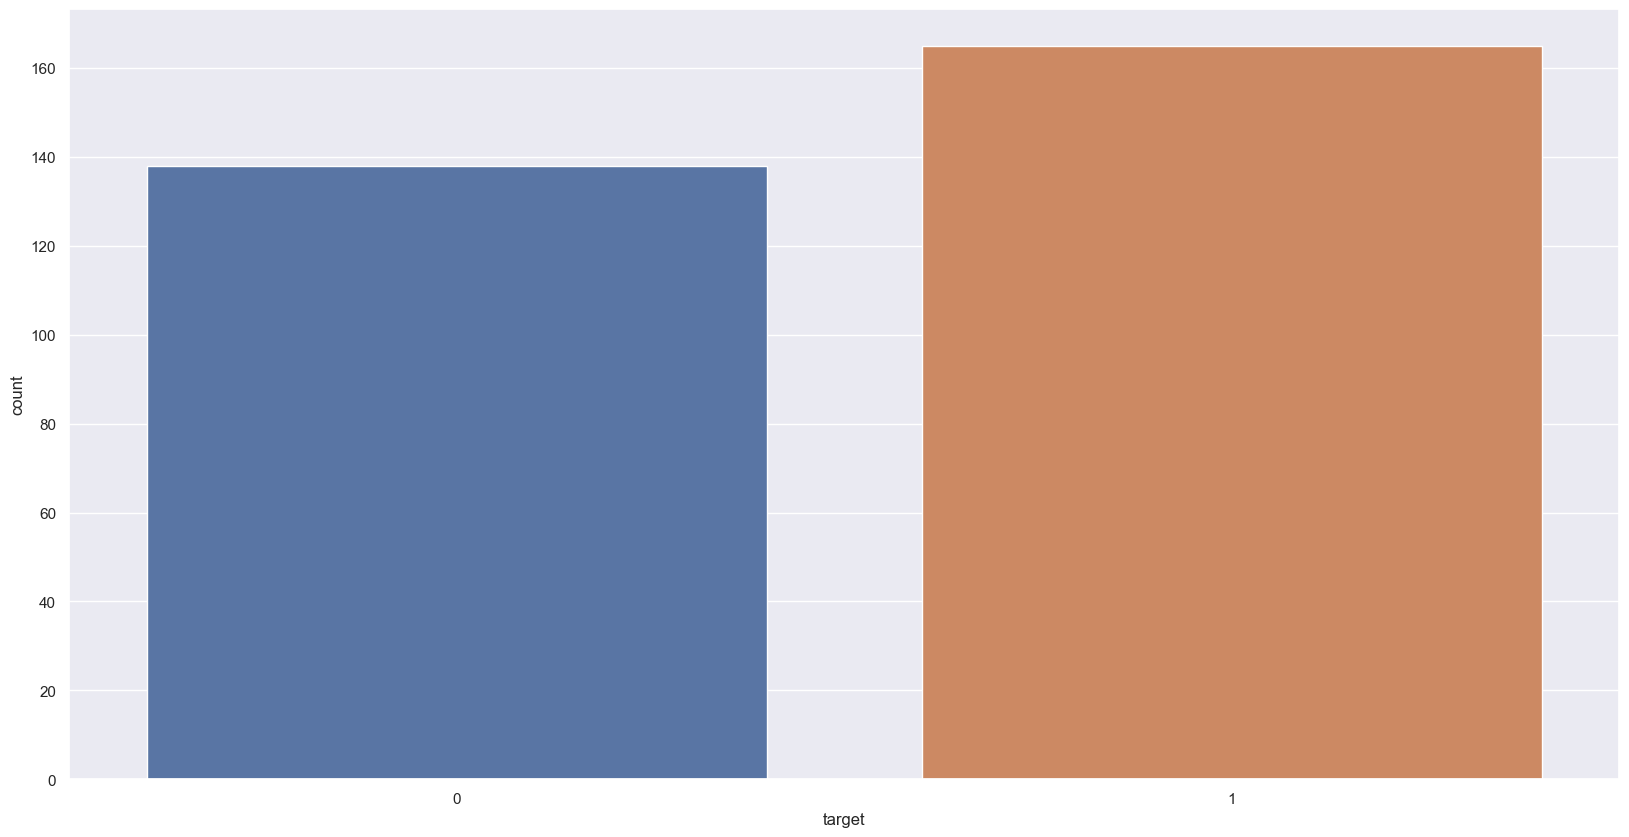

In [152]:
sns.countplot(x='target',data=df)

<Axes: >

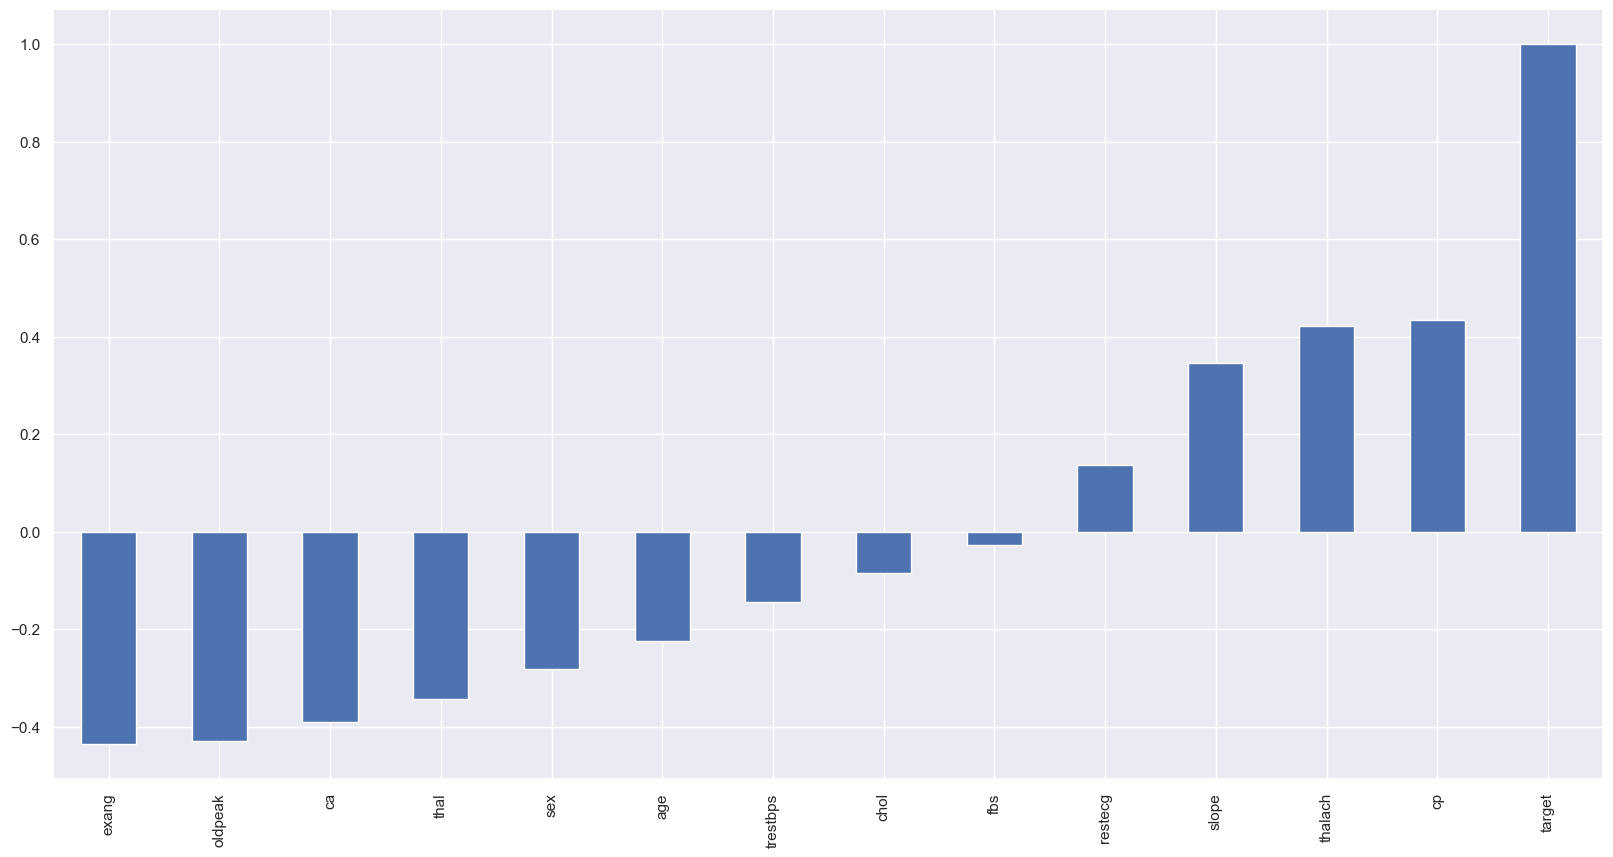

In [153]:
df.corr()['target'].sort_values().plot(kind='bar')

<Axes: >

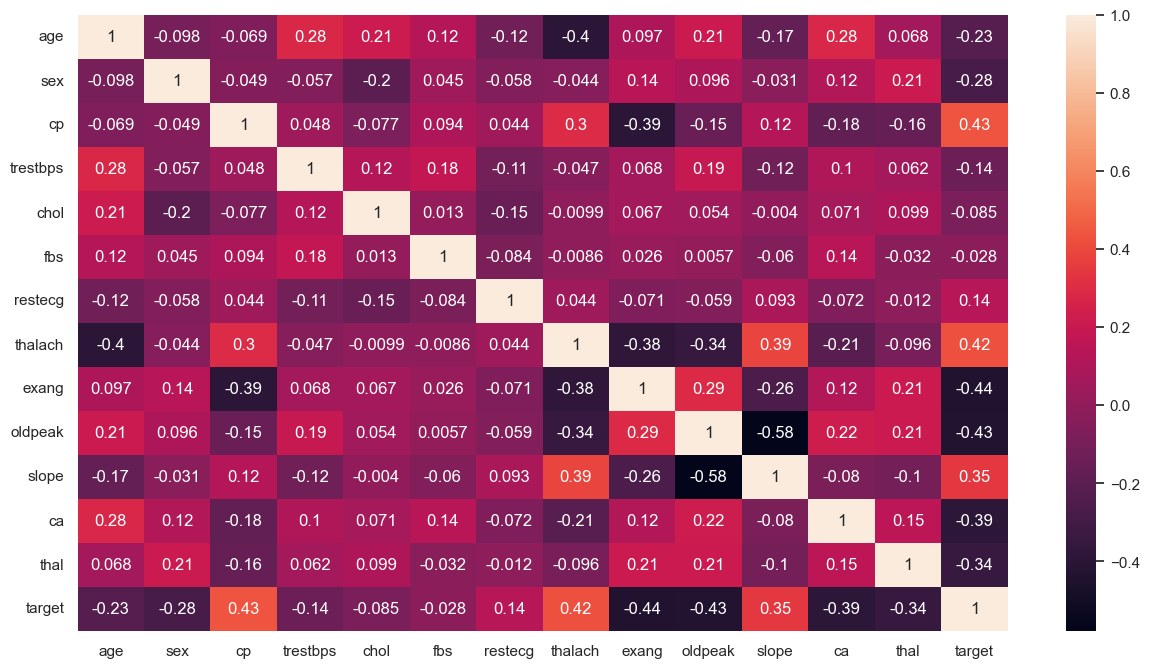

In [154]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True)

In [155]:
X= df.drop('target',axis=1).values
y= df['target'].values

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [158]:
type(X_test[0])

numpy.ndarray

In [159]:
from sklearn.preprocessing import MinMaxScaler 

In [160]:
scaler = MinMaxScaler()

In [161]:
X_train = scaler.fit_transform(X_train)

In [162]:
X_test = scaler.transform(X_test)

In [163]:
from tensorflow.keras.models import Sequential

In [164]:
from tensorflow.keras.layers import Dense, Dropout

In [165]:
X_train.shape

(212, 13)

In [166]:
model = Sequential()

model.add(Dense(13, activation='relu'))

model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [167]:
from tensorflow.keras.callbacks import EarlyStopping

In [168]:
earlyStop = EarlyStopping(verbose = 1, monitor = 'val_loss', mode = 'min', patience = 10)

In [169]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test), callbacks = [earlyStop])

Epoch 1/600
7/7 [==============================] - 2s 32ms/step - loss: 0.6939 - val_loss: 0.6878
Epoch 2/600
7/7 [==============================] - 0s 9ms/step - loss: 0.6832 - val_loss: 0.6796
Epoch 3/600
7/7 [==============================] - 0s 10ms/step - loss: 0.6731 - val_loss: 0.6719
Epoch 4/600
7/7 [==============================] - 0s 10ms/step - loss: 0.6631 - val_loss: 0.6649
Epoch 5/600
7/7 [==============================] - 0s 9ms/step - loss: 0.6539 - val_loss: 0.6572
Epoch 6/600
7/7 [==============================] - 0s 11ms/step - loss: 0.6448 - val_loss: 0.6492
Epoch 7/600
7/7 [==============================] - 0s 12ms/step - loss: 0.6360 - val_loss: 0.6400
Epoch 8/600
7/7 [==============================] - 0s 11ms/step - loss: 0.6261 - val_loss: 0.6305
Epoch 9/600
7/7 [==============================] - 0s 10ms/step - loss: 0.6158 - val_loss: 0.6205
Epoch 10/600
7/7 [==============================] - 0s 11ms/step - loss: 0.6055 - val_loss: 0.6102
Epoch 11/600
7/7 [===

In [170]:
losses= pd.DataFrame(model.history.history)

<Axes: >

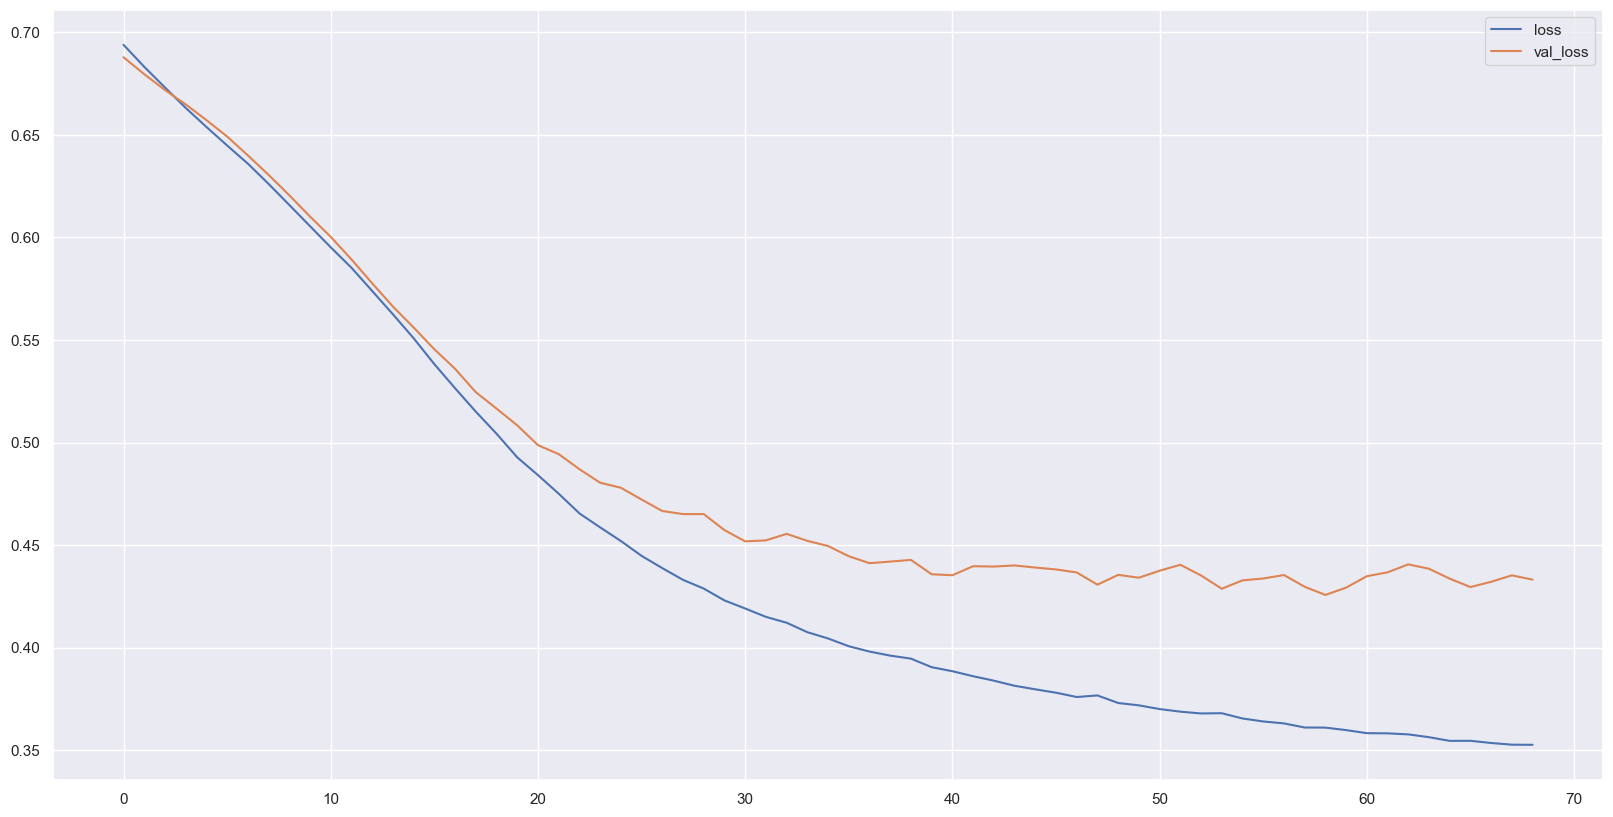

In [171]:
losses.plot()

In [172]:
from tensorflow.keras.layers import Dropout

In [173]:
X_train.shape

(212, 13)

In [174]:
model = Sequential()

model.add(Dense(13,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [175]:

model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test), callbacks = [earlyStop])

Epoch 1/600
7/7 [==============================] - 2s 42ms/step - loss: 0.8128 - val_loss: 0.7536
Epoch 2/600
7/7 [==============================] - 0s 15ms/step - loss: 0.8006 - val_loss: 0.7359
Epoch 3/600
7/7 [==============================] - 0s 12ms/step - loss: 0.8031 - val_loss: 0.7202
Epoch 4/600
7/7 [==============================] - 0s 13ms/step - loss: 0.7604 - val_loss: 0.7090
Epoch 5/600
7/7 [==============================] - 0s 12ms/step - loss: 0.7384 - val_loss: 0.7001
Epoch 6/600
7/7 [==============================] - 0s 12ms/step - loss: 0.7431 - val_loss: 0.6935
Epoch 7/600
7/7 [==============================] - 0s 11ms/step - loss: 0.7269 - val_loss: 0.6878
Epoch 8/600
7/7 [==============================] - 0s 10ms/step - loss: 0.7055 - val_loss: 0.6831
Epoch 9/600
7/7 [==============================] - 0s 12ms/step - loss: 0.6927 - val_loss: 0.6794
Epoch 10/600
7/7 [==============================] - 0s 11ms/step - loss: 0.6957 - val_loss: 0.6756
Epoch 11/600
7/7 [=

In [176]:
model_loss= pd.DataFrame(model.history.history)

<Axes: >

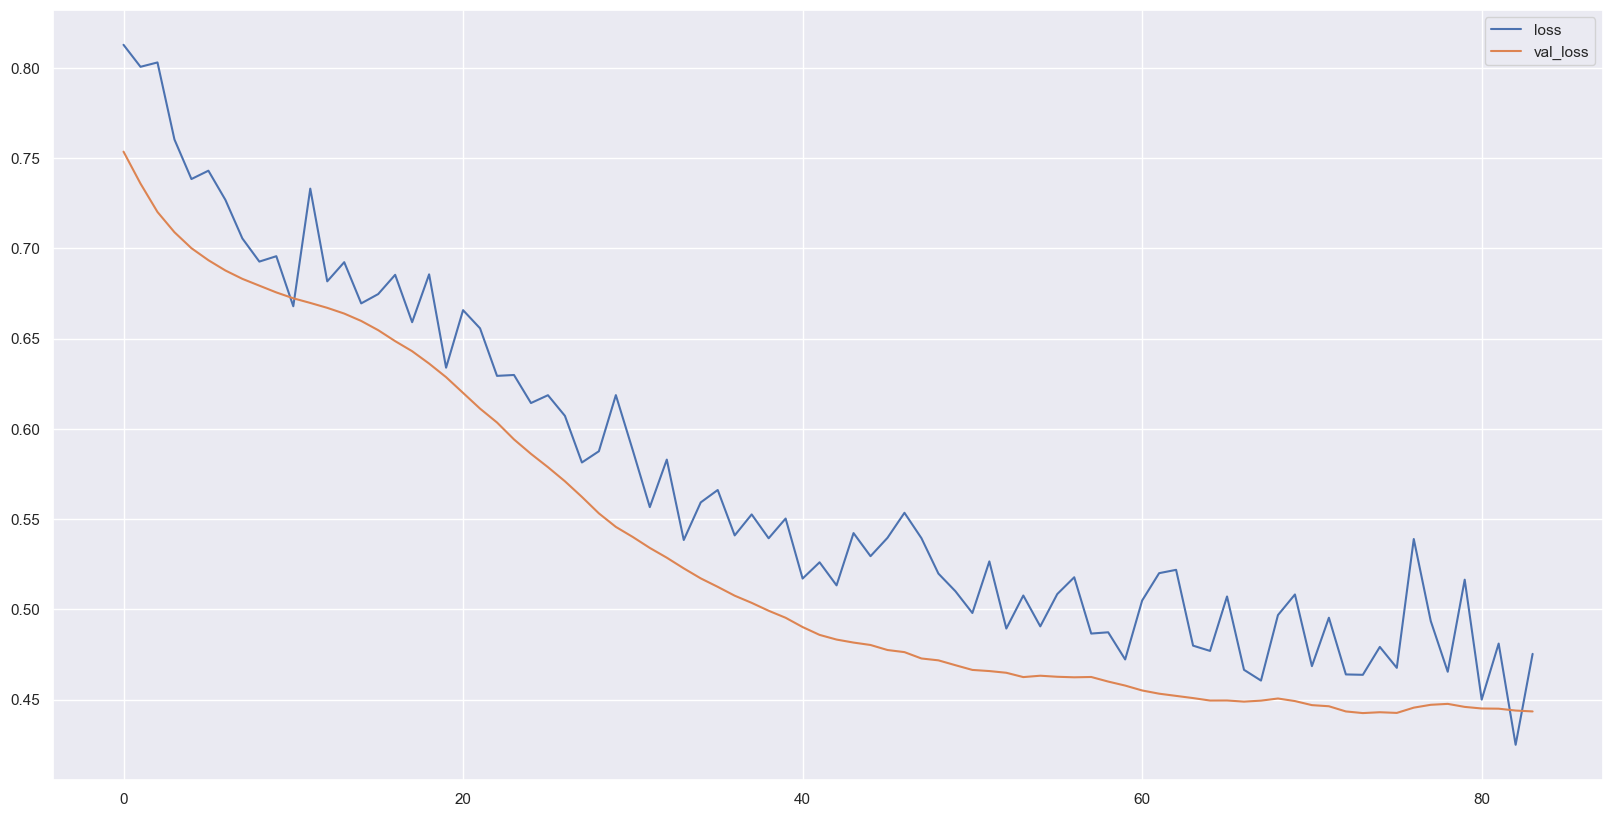

In [177]:
model_loss.plot()

In [178]:
X_test.shape

(91, 13)

In [179]:
model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


array([[0.15378857],
       [0.7440055 ],
       [0.78928953],
       [0.11151017],
       [0.85058147],
       [0.7962865 ],
       [0.36098033],
       [0.05062922],
       [0.03643633],
       [0.42696008],
       [0.57658666],
       [0.2714127 ],
       [0.8292861 ],
       [0.06216897],
       [0.8463835 ],
       [0.8203784 ],
       [0.8413914 ],
       [0.21876152],
       [0.05979639],
       [0.04623672],
       [0.6876713 ],
       [0.06799685],
       [0.3652153 ],
       [0.67666423],
       [0.7756969 ],
       [0.68385404],
       [0.8209981 ],
       [0.3697128 ],
       [0.12154923],
       [0.7774462 ],
       [0.12576017],
       [0.07461075],
       [0.05526581],
       [0.07876677],
       [0.7889063 ],
       [0.18578194],
       [0.7521817 ],
       [0.8037915 ],
       [0.6228719 ],
       [0.7350609 ],
       [0.4034114 ],
       [0.57031196],
       [0.8098703 ],
       [0.67738724],
       [0.794859  ],
       [0.03624294],
       [0.4948643 ],
       [0.863

In [180]:
new_preds = model.predict(X_test) * 100

3/3 [==============================] - 0s 3ms/step


In [181]:
import numpy as np

In [182]:
new_preds.shape

(91, 1)

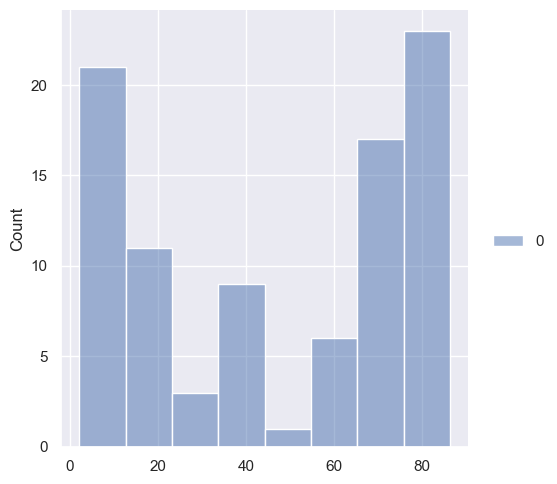

In [183]:
sns.displot(new_preds)

In [184]:
predictions_ann = (model.predict(X_test) > 0.5).astype("int32")

3/3 [==============================] - 0s 3ms/step


In [185]:
score_ann = round(accuracy_score(predictions_ann,y_test)*100,2)
score_ann

80.22

In [186]:
from sklearn.metrics import classification_report,confusion_matrix

In [187]:
print(classification_report(y_test,predictions_ann))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        41
           1       0.85      0.78      0.81        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



In [188]:
print(confusion_matrix(y_test,predictions_ann))

[[34  7]
 [11 39]]


In [189]:
model.save("my_model.h5")

Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression

In [191]:
logmodel = LogisticRegression()

In [192]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [193]:
prediction_lr = logmodel.predict(X_test)

In [194]:
score_lr = round(accuracy_score(prediction_lr,y_test)*100,2)
score_lr

80.22

In [195]:
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.83      0.80      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [196]:
from sklearn.metrics import confusion_matrix 

In [197]:
confusion_matrix(y_test,prediction_lr)

array([[33,  8],
       [10, 40]], dtype=int64)

KNN

In [198]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
from sklearn.neighbors import KNeighborsClassifier

In [200]:
knn = KNeighborsClassifier(n_neighbors=1)

In [201]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [202]:
predictions_knn = knn.predict(X_test)

In [203]:
score_knn = round(accuracy_score(predictions_knn,y_test)*100,2)
score_knn

74.73

In [204]:
from sklearn.metrics import classification_report,confusion_matrix

In [205]:
print(confusion_matrix(y_test,predictions_knn))

[[32  9]
 [14 36]]


In [206]:
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        41
           1       0.80      0.72      0.76        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



Support Vector Machine

In [207]:
from sklearn.svm import SVC

In [208]:
model = SVC()

In [209]:
model.fit(X_train,y_train)

SVC()

In [210]:
predictions_svm = model.predict(X_test)

In [211]:
score_svm = round(accuracy_score(predictions_svm,y_test)*100,2)
score_svm

81.32

In [212]:
from sklearn.metrics import classification_report,confusion_matrix

In [213]:
print(confusion_matrix(y_test,predictions_svm))

[[32  9]
 [ 8 42]]


In [214]:
print(classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [215]:
scores = [score_ann,score_lr,score_knn,score_svm]
Models = ["Ann","Logistic Regression","KNN","Support Vector Machine",]    

for i in range(len(Models)):
    print("The accuracy score achieved using "+Models[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Ann is: 80.22 %
The accuracy score achieved using Logistic Regression is: 80.22 %
The accuracy score achieved using KNN is: 74.73 %
The accuracy score achieved using Support Vector Machine is: 81.32 %


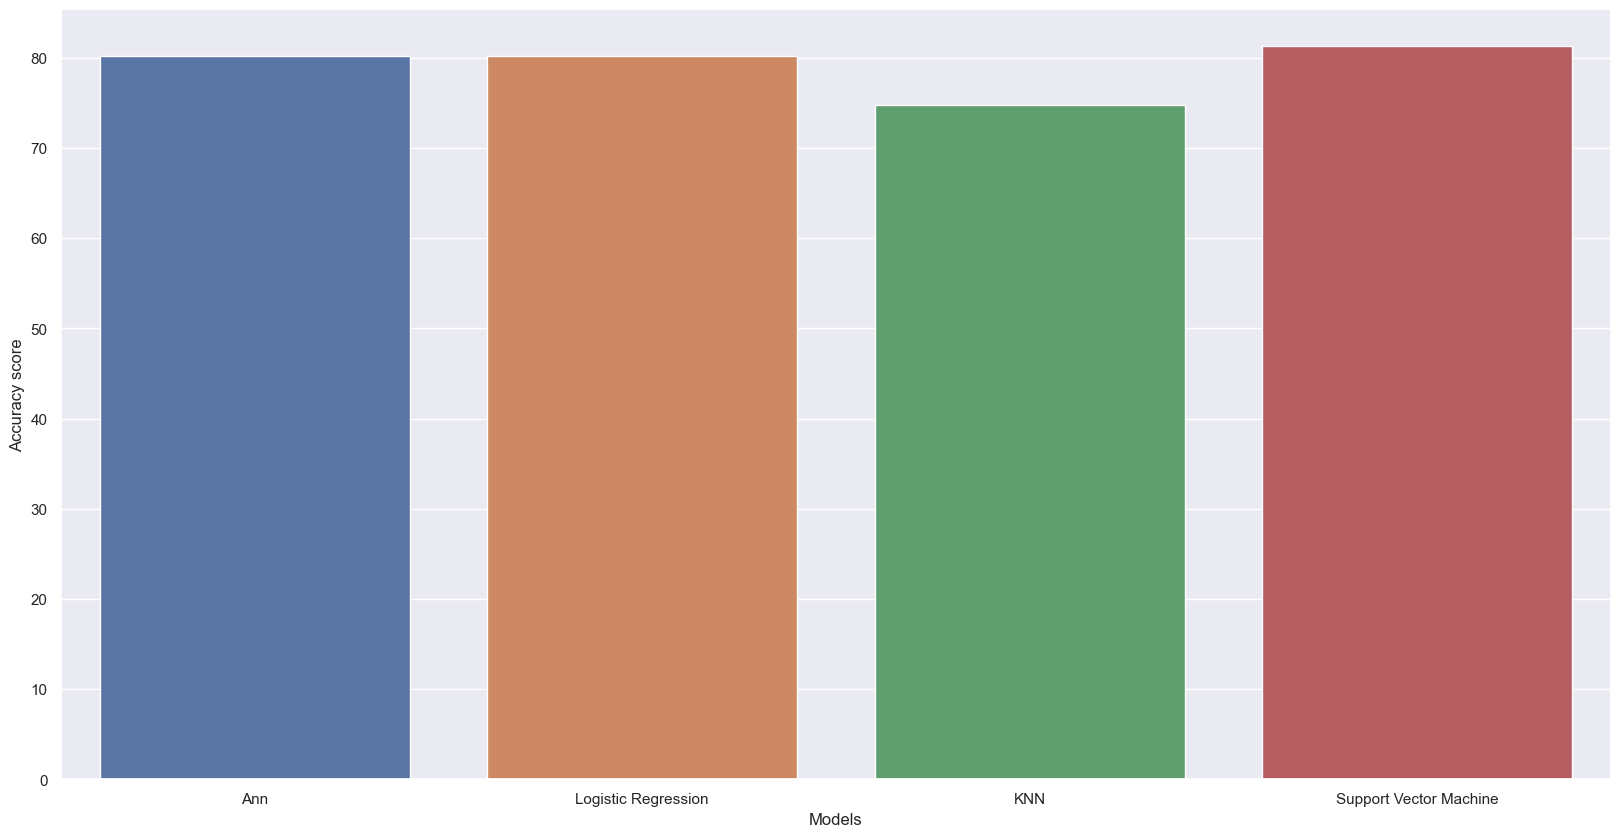

In [216]:
sns.set(style="darkgrid",rc={'figure.figsize':(20,10)})
plt.xlabel("Models",loc='center')
plt.ylabel("Accuracy score")

sns.barplot(x = Models, y = scores)
plt.savefig("AccuracyScores.png")